In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [6]:
students = pd.read_csv("datasets_74977_169835_StudentsPerformance.csv")

In [8]:
students.to_excel("students.xlsx")

In [ ]:
# 1st Part

In [16]:
students.groupby("gender").mean().T
# It can clearly be observed male students are more successfull in math, nevertheless female ones are successfull in reading and writing.

gender,female,male
math score,63.63,68.73
reading score,72.61,65.47
writing score,72.47,63.31


In [22]:
students.dropna(inplace=True)

In [23]:
# Test whether group differences are significant.
students_g = students["gender"].unique()
grup_students = students.groupby("gender")

In [24]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(students_g)):
        for j in range(i+1, len(students_g)):
            ttest = stats.ttest_ind(students[students["gender"]==students_g[i]][var], 
                                students[students["gender"]==students_g[j]][var])
            group_1 = students_g[i]
            group_2 = students_g[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,female,male,-5.383245869828983,0.000000091201855


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,female,male,7.959308005187657,0.000000000000005


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,female,male,9.979557910004507,0.000000000000000


In [ ]:
# gender makes effects in all scores

In [18]:
students.groupby("race/ethnicity").mean().T
# there is a gradually increase related to the origins.

race/ethnicity,group A,group B,group C,group D,group E
math score,61.63,63.45,64.46,67.36,73.82
reading score,64.67,67.35,69.10,70.03,73.03
writing score,62.67,65.60,67.83,70.15,71.41


In [19]:
students.groupby("parental level of education").mean().T
# Again there is a gradually increase related to education level of parents.

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.88,69.39,62.14,69.75,67.13,63.50
reading score,70.93,73.00,64.70,75.37,69.46,66.94
writing score,69.90,73.38,62.45,75.68,68.84,64.89


In [ ]:
# 2nd Part

In [20]:
students.groupby("lunch").mean().T
# Lunch type has a great effect on the scores where standard lunch effects positively

lunch,free/reduced,standard
math score,58.92,70.03
reading score,64.65,71.65
writing score,63.02,70.82


In [ ]:
# 3rd Part

In [21]:
students.groupby("test preparation course").mean().T
# the preparation courses have a big impact on exam performance

test preparation course,completed,none
math score,69.70,64.08
reading score,73.89,66.53
writing score,74.42,64.50


In [ ]:
# 4th Part
# Reading and Writing scores correlates much.

In [9]:
students.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [13]:
sc = students.corr()
display(sc)

,math score,reading score,writing score
math score,1.00,0.82,0.80
reading score,0.82,1.00,0.95
writing score,0.80,0.95,1.00


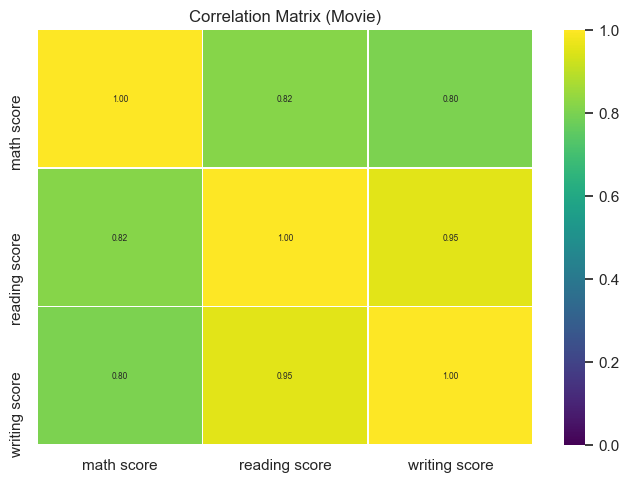

In [15]:
sns.heatmap(sc, annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)")

plt.show()